In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print("X_train:",len(X_train),"| X_test:",len(X_test),"| y_train:",len(y_train),"| y_test:",len(y_test))

X_train: 38 | X_test: 10 | y_train: 38 | y_test: 10


In [14]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [15]:
y_pred = reg.predict(X_test)
y_pred

array([547., 414., 574., 554., 631., 644., 648., 540., 414., 464.])

In [16]:
for a, b in zip(y_test, y_pred):
    print("test:",a,"| pred:",b)

test: 534 | pred: 547.0
test: 410 | pred: 414.0
test: 577 | pred: 574.0
test: 571 | pred: 554.0
test: 577 | pred: 631.0
test: 704 | pred: 644.0
test: 487 | pred: 648.0
test: 587 | pred: 540.0
test: 467 | pred: 414.0
test: 580 | pred: 464.0


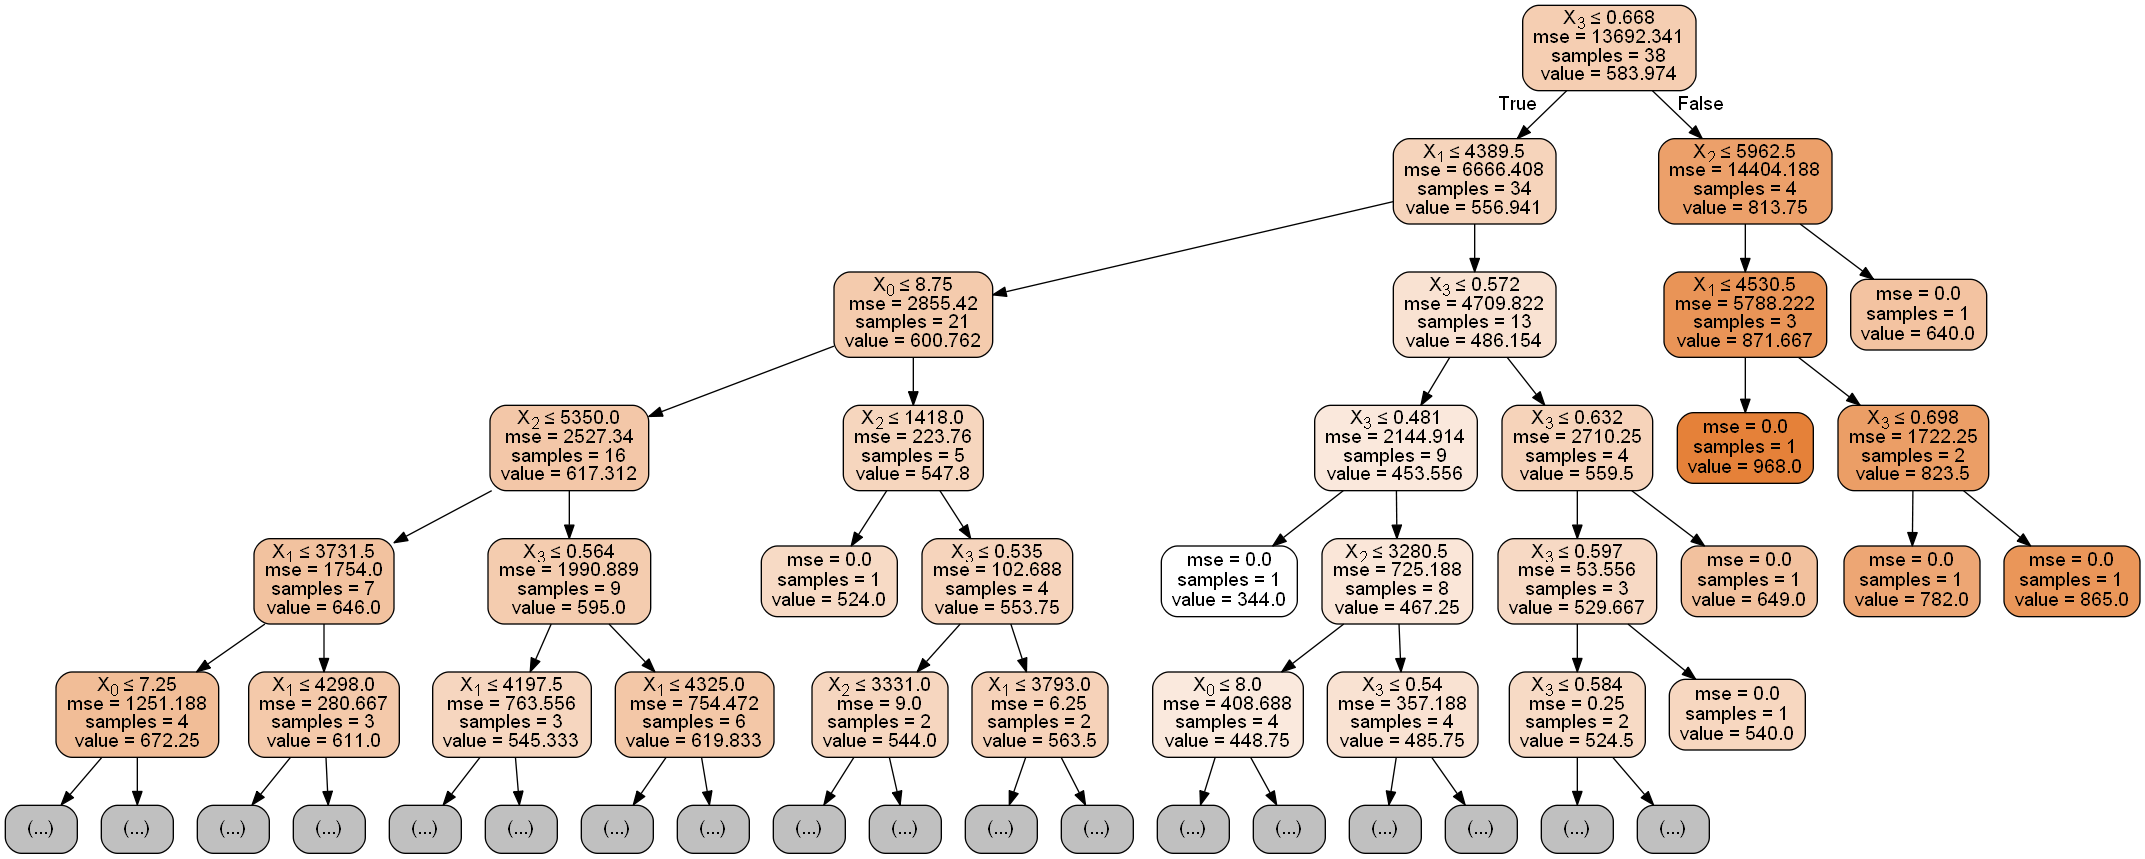

In [17]:
import os     

#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(reg, out_file=dot_data, max_depth=5,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())